### Data preprocessing and exploration

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
laptop_sales_df = pd.read_csv('../Datasets/LaptopSales.csv').dropna(subset=['Date'])
laptop_sales_df.head()

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,customer X,customer Y,store X,store Y
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455.0,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545.0,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515.0,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395.0,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585.0,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0


In [3]:
laptop_sales_df['Retail Price'].interpolate(method='linear', inplace=True)

In [4]:
laptop_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297364 entries, 0 to 297571
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    297364 non-null  object 
 1   Configuration           297364 non-null  int64  
 2   Customer Postcode       297364 non-null  object 
 3   Store Postcode          297364 non-null  object 
 4   Retail Price            297364 non-null  float64
 5   Screen Size (Inches)    297364 non-null  int64  
 6   Battery Life (Hours)    297364 non-null  int64  
 7   RAM (GB)                297364 non-null  int64  
 8   Processor Speeds (GHz)  297364 non-null  float64
 9   Integrated Wireless?    297364 non-null  object 
 10  HD Size (GB)            297364 non-null  int64  
 11  Bundled Applications?   297364 non-null  object 
 12  customer X              297364 non-null  int64  
 13  customer Y              297364 non-null  int64  
 14  store X             

### What is the average retail price for a laptop by store?

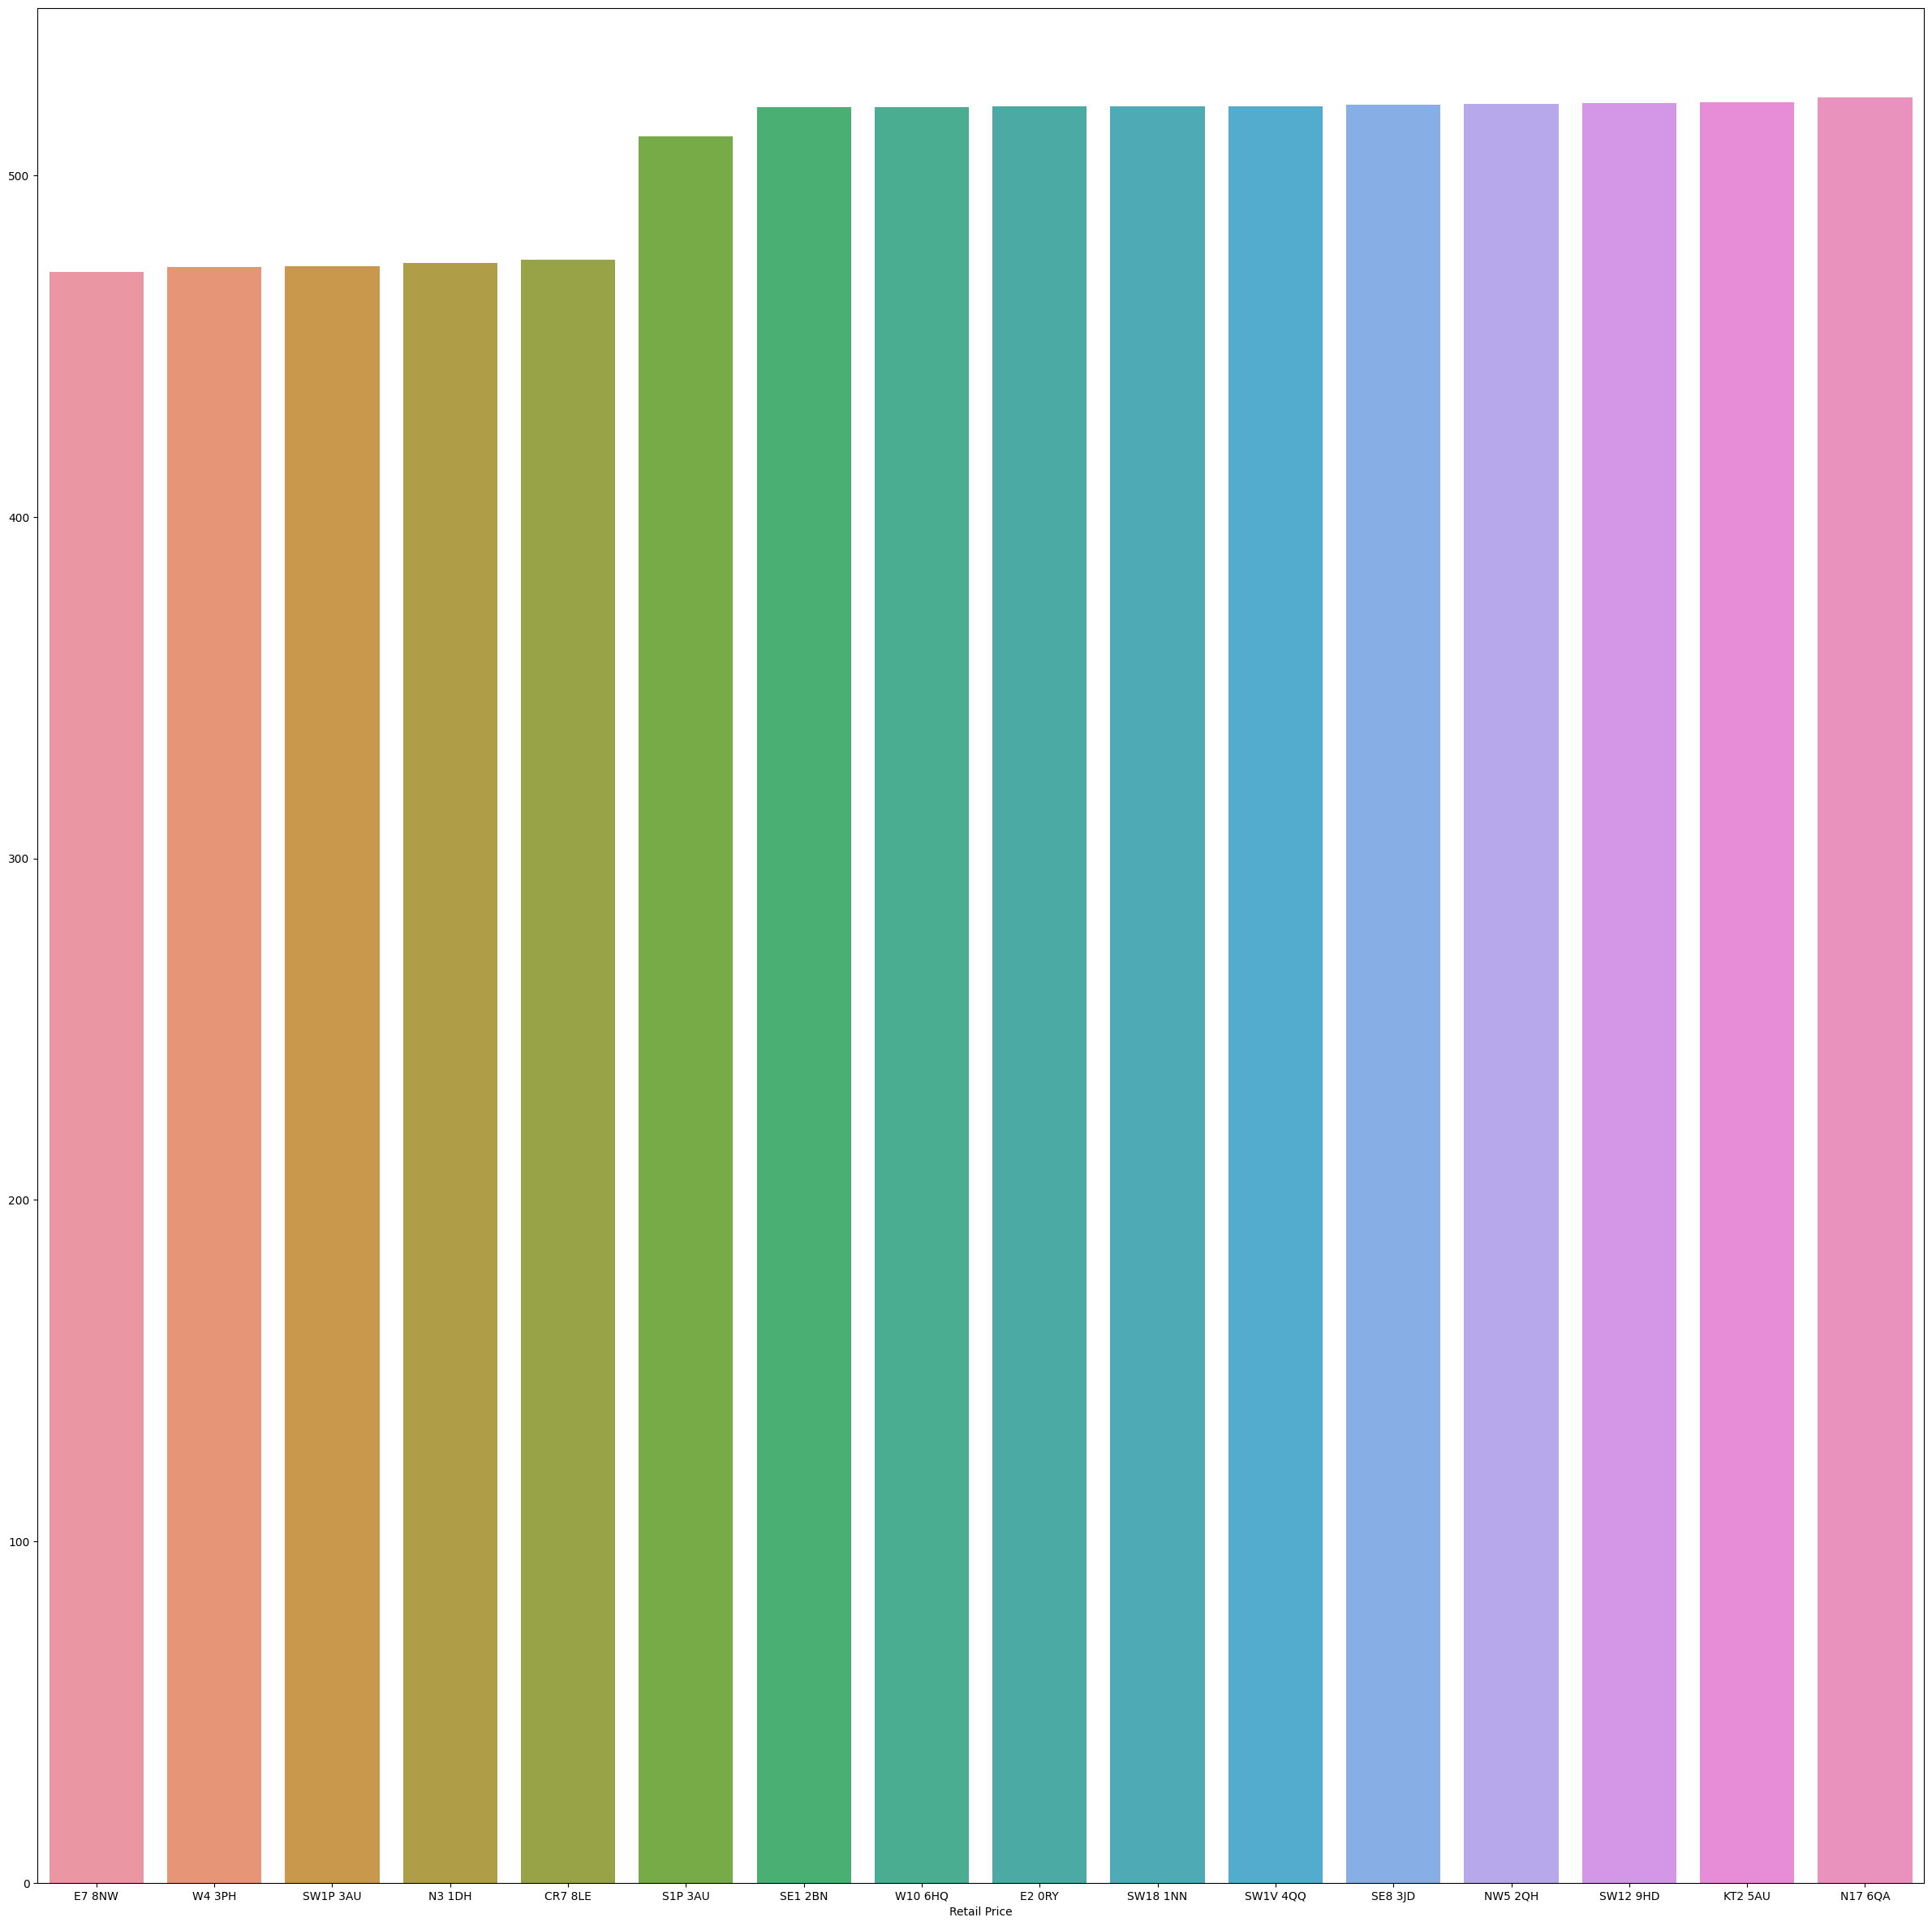

In [10]:
fig, ax = plt.subplots(figsize=(30, 30))
grouped_df = laptop_sales_df.groupby('Store Postcode')['Retail Price'].mean().sort_values()
sns.barplot(grouped_df, x=grouped_df.index, y=grouped_df.values, ax=ax)
ax.set_xticklabels(grouped_df.index)
plt.show()

### How does retail price vary with respect to configuration?

Configuration Bins
0    394.672407
1    482.126366
2    454.327384
3    512.941012
4    584.419178
5    498.365901
6    579.995386
7    556.775122
8    613.036832
9    680.397733
Name: Retail Price, dtype: float64


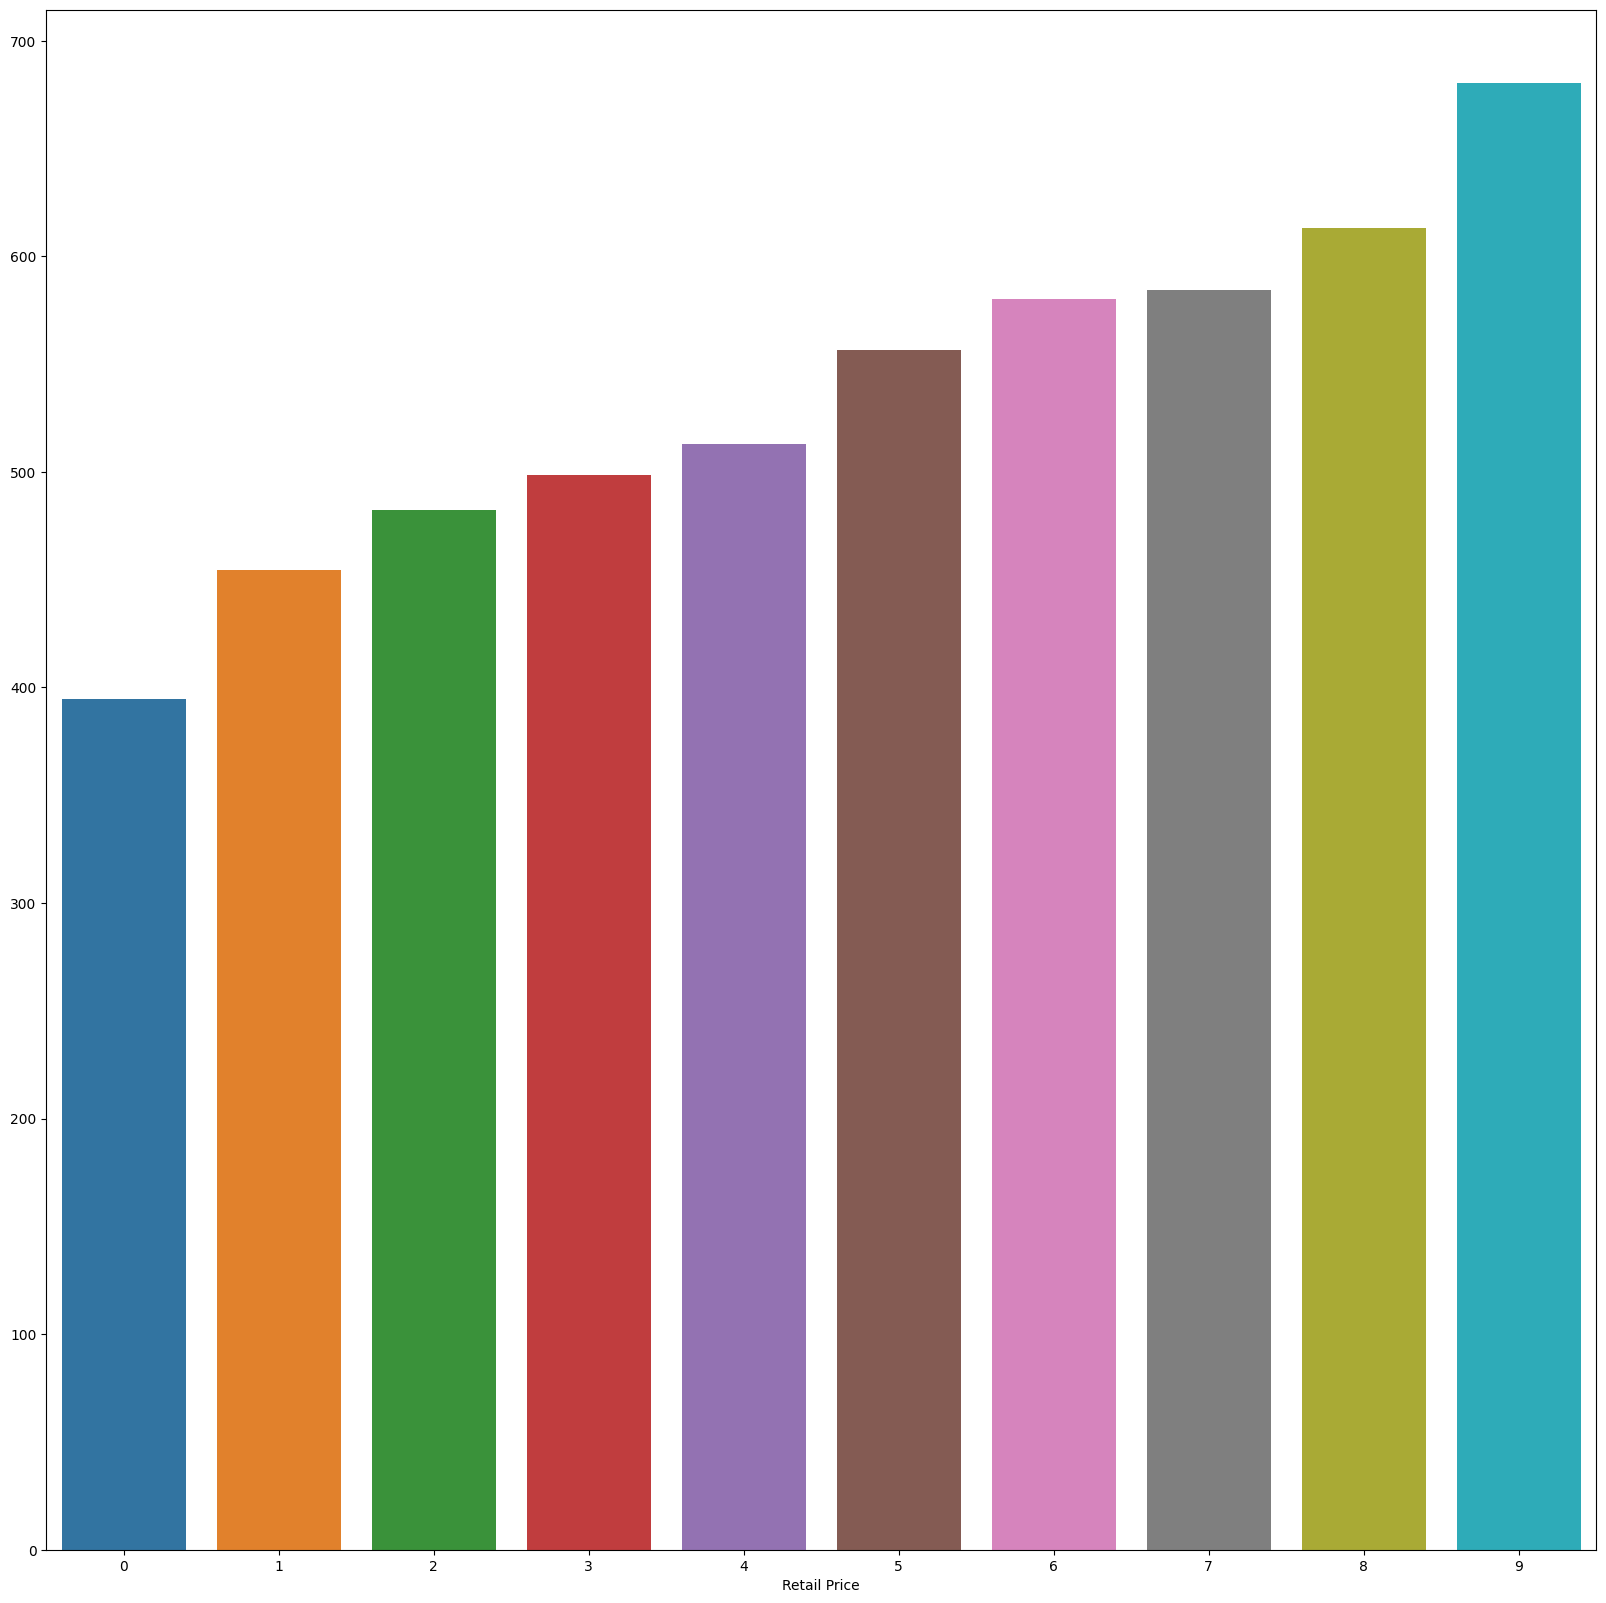

In [60]:
fig, ax = plt.subplots(figsize=(20, 20))
no_of_bins = 10
grouped_df = laptop_sales_df.groupby('Configuration')['Retail Price'].mean().reset_index()
grouped_df['Configuration Bins'] = pd.cut(grouped_df['Configuration'], bins=no_of_bins, labels=range(no_of_bins))
grouped_df = grouped_df.groupby('Configuration Bins')['Retail Price'].mean()
sns.barplot(grouped_df, x=grouped_df.index, y=grouped_df.values, ax=ax)
ax.set_xticklabels(grouped_df.index)
plt.show()

We see that as we increase the configuration, the average retail price also goes up.

### Do all stores sell all the configurations?

In [22]:
engine = create_engine('sqlite://')
laptop_sales_df.to_sql('laptop_sales', con=engine)

297364

In [32]:
query = """
SELECT COUNT(DISTINCT(Configuration))
FROM laptop_sales
GROUP BY `Store Postcode`
"""
pd.read_sql(query, engine)

,COUNT(DISTINCT(Configuration))
0,857
1,864
2,819
3,832
4,840
5,798
6,864
7,134
8,864
9,864


Not all stores sell all the 864 configurations